In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("bengaluru_house_prices.csv")
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [3]:
df.shape

(13320, 9)

### Data Preprocessing and Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df.society.unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      shape=(2689,), dtype=object)

In [7]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [8]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], shape=(1306,), dtype=object)

In [9]:
#Dropping Unessacery Columns
df.drop(['availability','society','area_type'],axis='columns',inplace=True)
df.head(10)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
5,Whitefield,2 BHK,1170,2.0,1.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,NaN,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,NaN,600.00
8,Marathahalli,3 BHK,1310,3.0,1.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,NaN,370.00


### Handling NA values

In [10]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12710 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12710 non-null  object 
 1   size        12710 non-null  object 
 2   total_sqft  12710 non-null  object 
 3   bath        12710 non-null  float64
 4   balcony     12710 non-null  float64
 5   price       12710 non-null  float64
dtypes: float64(3), object(3)
memory usage: 695.1+ KB


## Feature Engineering

In [11]:
#Size Column
df['size']=df['size'].apply(lambda x: int(str(x).split(' ')[0]))
df.head(10)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Uttarahalli,3,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Kothanur,2,1200,2.0,1.0,51.00
5,Whitefield,2,1170,2.0,1.0,38.00
8,Marathahalli,3,1310,3.0,1.0,63.25
10,Whitefield,3,1800,2.0,2.0,70.00
11,Whitefield,4,2785,5.0,3.0,295.00
12,7th Phase JP Nagar,2,1000,2.0,1.0,38.00


In [12]:
df['size'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df[~df['total_sqft'].apply(is_float)].count()

location      186
size          186
total_sqft    186
bath          186
balcony       186
price         186
dtype: int64

In [15]:
df[~df['total_sqft'].apply(is_float)].head(10)


,location,size,total_sqft,bath,balcony,price
30,Yelahanka,4,2100 - 2850,4.0,0.0,186.000
122,Hebbal,4,3067 - 8156,4.0,0.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,0.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,0.0,43.490
188,KR Puram,2,1015 - 1540,2.0,0.0,56.800
410,Kengeri,1,34.46Sq. Meter,1.0,0.0,18.500
549,Hennur Road,2,1195 - 1440,2.0,0.0,63.770
661,Yelahanka,2,1120 - 1145,2.0,0.0,48.130
672,Bettahalsoor,4,3090 - 5002,4.0,0.0,445.000
772,Banashankari Stage VI,2,1160 - 1195,2.0,0.0,59.935


In [16]:
df[~df['total_sqft'].apply(is_float)].sample(10)


,location,size,total_sqft,bath,balcony,price
5783,Sarjapur,4,2580 - 2591,4.0,0.0,139.500
9423,Ramamurthy Nagar,1,1Grounds,1.0,1.0,48.000
8023,Devanahalli,4,4900 - 4940,4.0,0.0,393.500
5908,Sonnenahalli,1,605 - 624,1.0,0.0,30.715
1542,Sarjapur Road,1,580 - 650,1.0,0.0,17.835
7747,Thanisandra,1,620 - 934,1.0,0.0,38.535
11827,Magadi Road,3,1052 - 1322,2.0,0.0,55.195
1614,Sarjapur Road,4,3425 - 3435,6.0,0.0,228.500
10050,Old Madras Road,5,4500 - 5540,7.0,0.0,287.000
9164,Jakkur,2,1230 - 1290,2.0,0.0,71.195


In [17]:
def transform1(x):
    x=str(x)
    try:
        if is_float(x)==True:
            x=float(x)
        if 'Sq. Yards' in x :
            x=float(x.replace('Sq. Yards',""))*9.0
        if 'Sq. Meter' in x :
            x=float(x.replace('Sq. Meter',""))*10.7639
        if 'Acres' in x :
            x=float(x.replace('Acres',""))*43560
        if 'Grounds' in x :
            x=float(x.replace('Grounds',""))*2400
        if 'Cents' in x :
            x=float(x.replace('Cents',""))*435.56
        if 'Guntha' in x :
            x=float(x.replace('Guntha',""))*1089
        if '-' in x:
            lst=x.split()
            x=float(lst[0])+float(lst[2])
        return x
    except:
        return x

In [18]:
df['total_sqft']=df['total_sqft'].apply(transform1)
df.head(10)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Kothanur,2,1200.0,2.0,1.0,51.00
5,Whitefield,2,1170.0,2.0,1.0,38.00
8,Marathahalli,3,1310.0,3.0,1.0,63.25
10,Whitefield,3,1800.0,2.0,2.0,70.00
11,Whitefield,4,2785.0,5.0,3.0,295.00
12,7th Phase JP Nagar,2,1000.0,2.0,1.0,38.00


In [19]:
df[~df['total_sqft'].apply(is_float)].count()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [20]:
df['Price_per_sqft']=df.price*100000/df.total_sqft
df.head(10)

,location,size,total_sqft,bath,balcony,price,Price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000
5,Whitefield,2,1170.0,2.0,1.0,38.00,3247.863248
8,Marathahalli,3,1310.0,3.0,1.0,63.25,4828.244275
10,Whitefield,3,1800.0,2.0,2.0,70.00,3888.888889
11,Whitefield,4,2785.0,5.0,3.0,295.00,10592.459605
12,7th Phase JP Nagar,2,1000.0,2.0,1.0,38.00,3800.000000


In [21]:
len(df.location.unique())

1265

In [22]:
df.location=df.location.apply(lambda x:x.strip())
locs=df.groupby('location')['location'].agg('count').sort_values(ascending=False)
locs

location
Whitefield             515
Sarjapur  Road         372
Electronic City        302
Kanakpura Road         261
Thanisandra            234
                      ... 
Whietfield,              1
Whitefield ECC Road      1
Williams Town            1
Xavier Layout            1
Viviani Road             1
Name: location, Length: 1254, dtype: int64

In [23]:
len(locs[locs <= 10])

1017

In [24]:
locs_10=locs[locs <= 10]
locs_10

location
Ganga Nagar              10
1st Block Koramangala    10
Basapura                 10
Nagappa Reddy Layout     10
Naganathapura            10
                         ..
Whietfield,               1
Whitefield ECC Road       1
Williams Town             1
Xavier Layout             1
Viviani Road              1
Name: location, Length: 1017, dtype: int64

In [25]:
len(df.location.unique())

1254

### Dimensionality Reduction

In [26]:
df['location']=df['location'].apply(lambda x: 'Others' if x in locs_10 else x)
len(df.location.unique())

238

From Knowledge about homes and housing market, we can find outliers 
1. A BHK must have more than 300 sq foot area
2. Higher BHK having same area should have higher price 

In [27]:
df[df['total_sqft']/df['size'] < 300].head(10)

,location,size,total_sqft,bath,balcony,price,Price_per_sqft
58,Murugeshpalya,6,1407.0,4.0,1.0,150.0,10660.980810
68,Devarachikkanahalli,8,1350.0,7.0,0.0,85.0,6296.296296
70,Others,3,500.0,3.0,2.0,100.0,20000.000000
78,Kaval Byrasandra,2,460.0,1.0,0.0,22.0,4782.608696
89,Rajaji Nagar,6,710.0,6.0,3.0,160.0,22535.211268
119,Hennur Road,2,276.0,3.0,3.0,23.0,8333.333333
129,Vishwapriya Layout,7,950.0,7.0,0.0,115.0,12105.263158
170,Others,6,1300.0,6.0,0.0,99.0,7615.384615
176,Kumaraswami Layout,5,600.0,3.0,2.0,85.0,14166.666667
193,Others,7,1800.0,7.0,1.0,250.0,13888.888889


In [28]:
df[df['total_sqft']/df['size'] < 300].count()

location          659
size              659
total_sqft        659
bath              659
balcony           659
price             659
Price_per_sqft    659
dtype: int64

In [29]:
df.shape

(12710, 7)

In [30]:
df2=df[df['total_sqft']/df['size'] > 300]
df2.shape

(11885, 7)

In [31]:
df2.Price_per_sqft.describe()

count     11885.000000
mean       6083.190757
std        3912.375558
min           2.257423
25%        4137.492043
50%        5208.333333
75%        6736.068585
max      176470.588235
Name: Price_per_sqft, dtype: float64

In [32]:
def remove_outliers(df):
    df_new=pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m=np.mean(subdf.Price_per_sqft)
        std=np.std(subdf.Price_per_sqft)
        out_df=subdf[(subdf.Price_per_sqft > (m-std)) & (subdf.Price_per_sqft < (m+std))]
        df_new=pd.concat([df_new,out_df],ignore_index=True)
    return df_new
df3=remove_outliers(df2)
df3.shape

(9692, 7)

In [33]:
df3.head(10)

,location,size,total_sqft,bath,balcony,price,Price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,1.0,428.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,2.0,194.0,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,3.0,235.0,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,0.0,130.0,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,2.0,148.0,11983.805668
5,1st Block Jayanagar,4,2750.0,4.0,0.0,413.0,15018.181818
6,1st Block Jayanagar,4,2450.0,4.0,2.0,368.0,15020.408163
7,1st Phase JP Nagar,4,2825.0,4.0,3.0,250.0,8849.557522
8,1st Phase JP Nagar,3,1875.0,3.0,1.0,167.0,8906.666667
9,1st Phase JP Nagar,3,2065.0,4.0,1.0,210.0,10169.491525


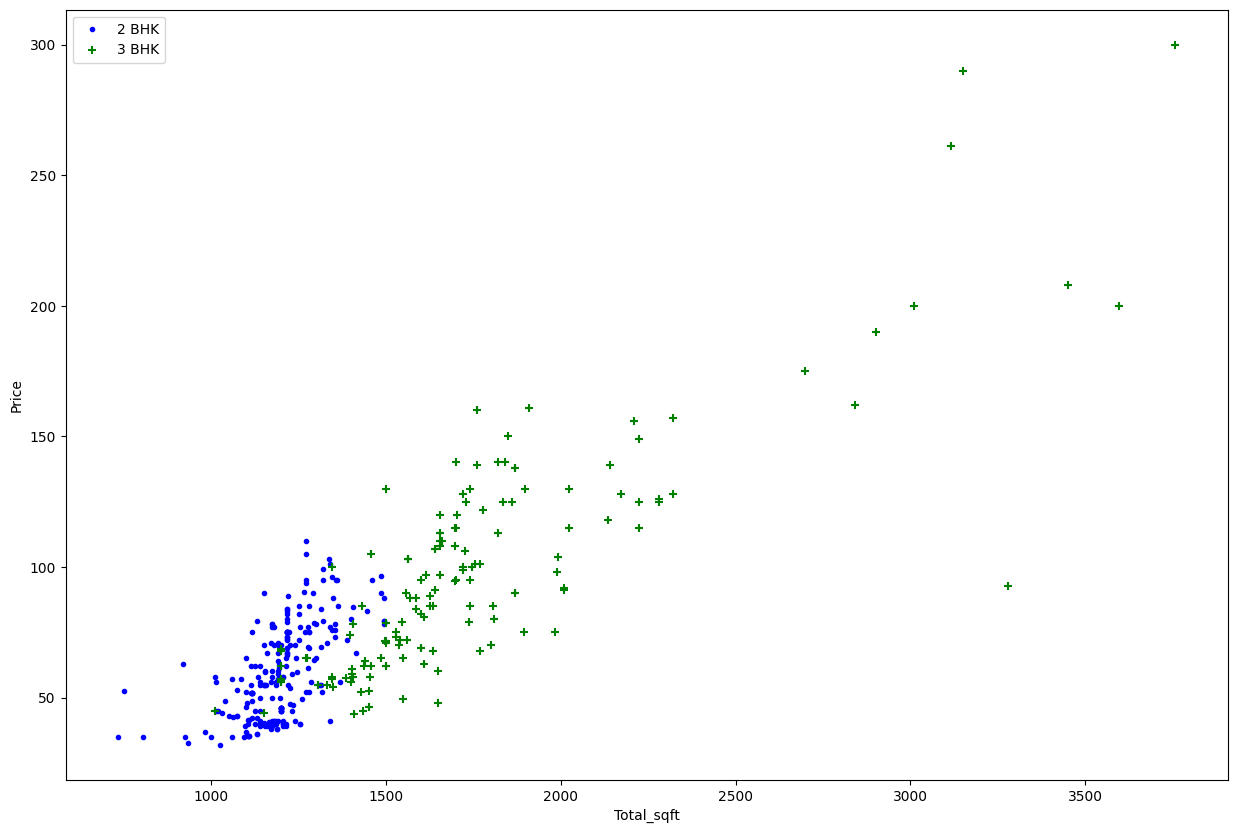

In [46]:
def plot_bhk(df,place):
    bhk2=df[(df['location']==place) & (df['size']==2)]
    bhk3=df[(df['location']==place) & (df['size']==3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2.total_sqft,bhk2.price,c='b',marker='.',label='2 BHK')
    plt.scatter(bhk3.total_sqft,bhk3.price,c='g',marker='+',label='3 BHK')
    plt.xlabel('Total_sqft')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

plot_bhk(df3,'Whitefield')

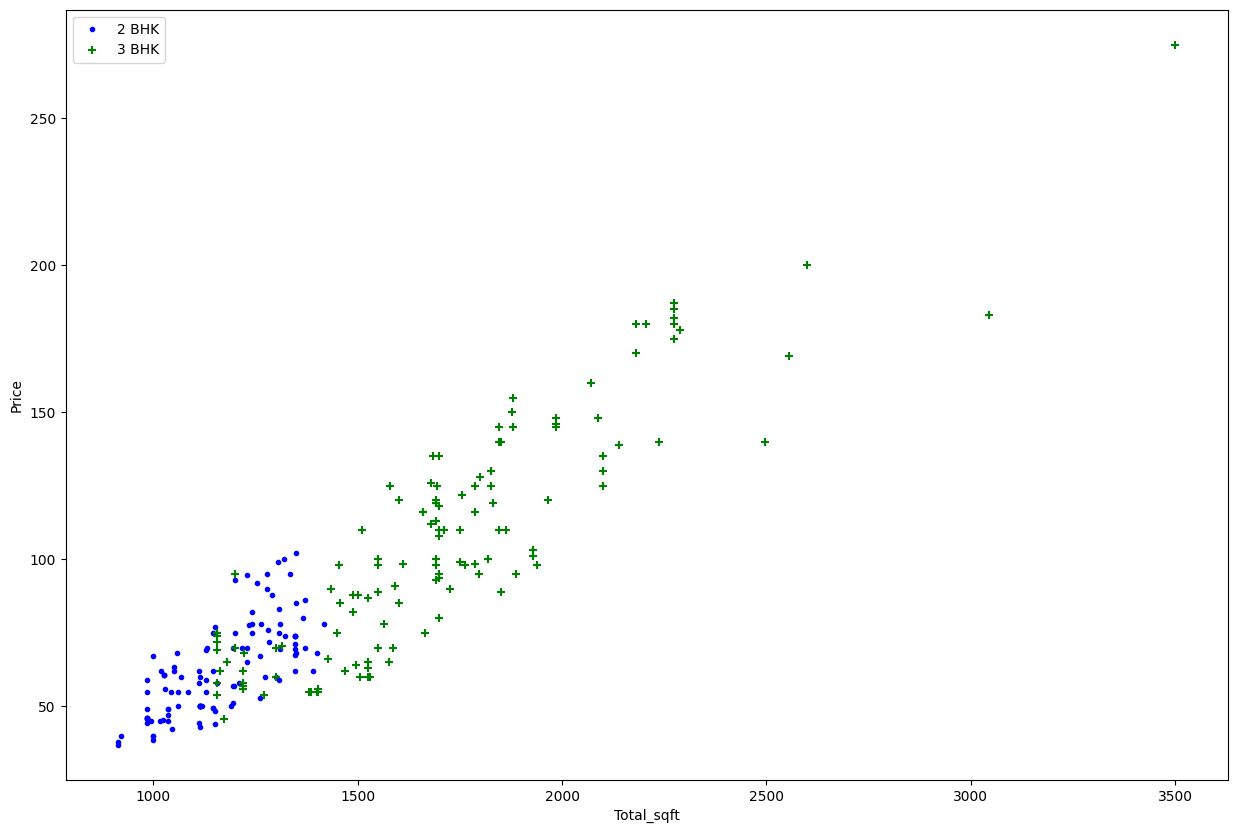

In [47]:
plot_bhk(df3,'Sarjapur  Road')

In [48]:
df3[df3['size'] == 2]['Price_per_sqft'].mean()

np.float64(5065.731048359307)


#### Removing BHK Outliers

The `remove_bhk_outliers` function helps clean the data by removing properties where a higher BHK (bedroom) apartment in the same location is priced lower (per sqft) than a lower BHK apartment. It compares the average price per sqft of each BHK group and removes outliers where this rule is violated, ensuring more consistent and reliable pricing data.
```

In [49]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_per_sqft),
                'std': np.std(bhk_df.Price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df4 = remove_bhk_outliers(df3)

df4.shape

(6901, 7)

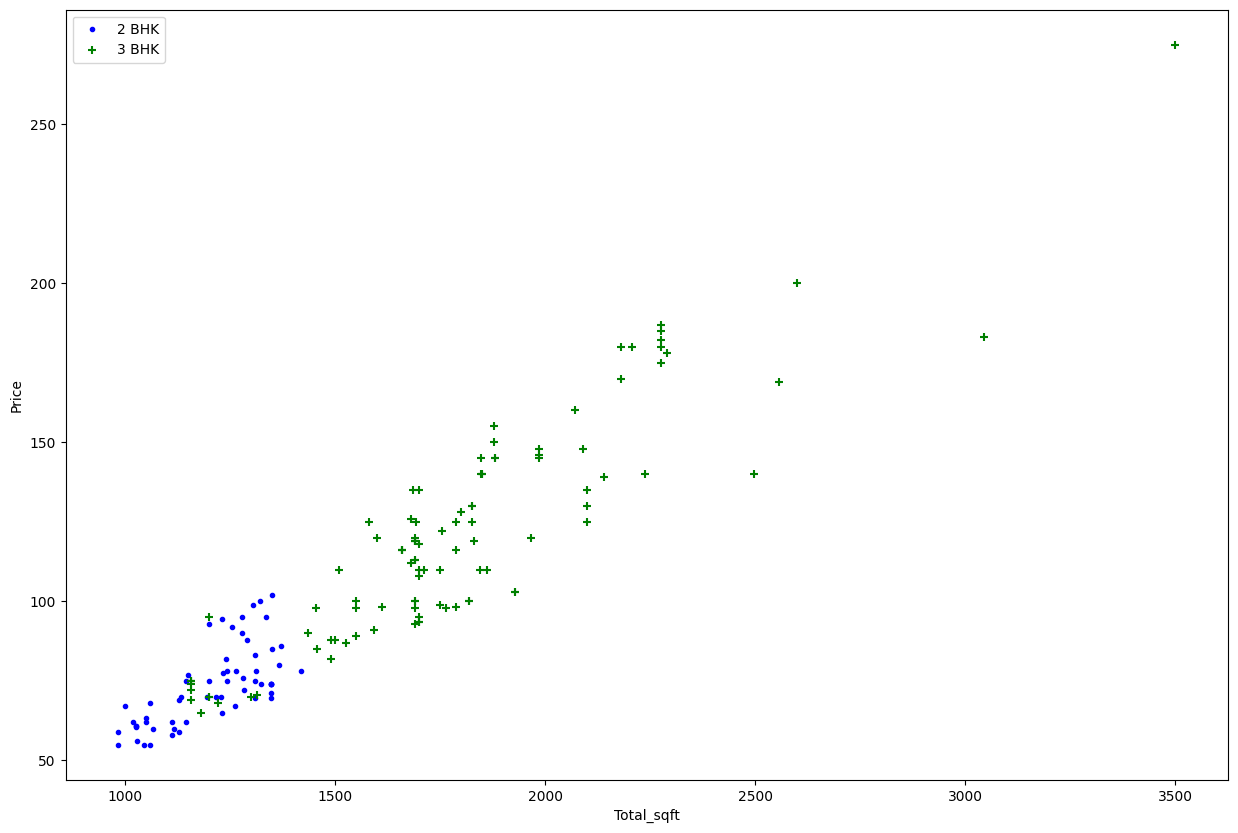

In [50]:
plot_bhk(df4,'Sarjapur  Road')

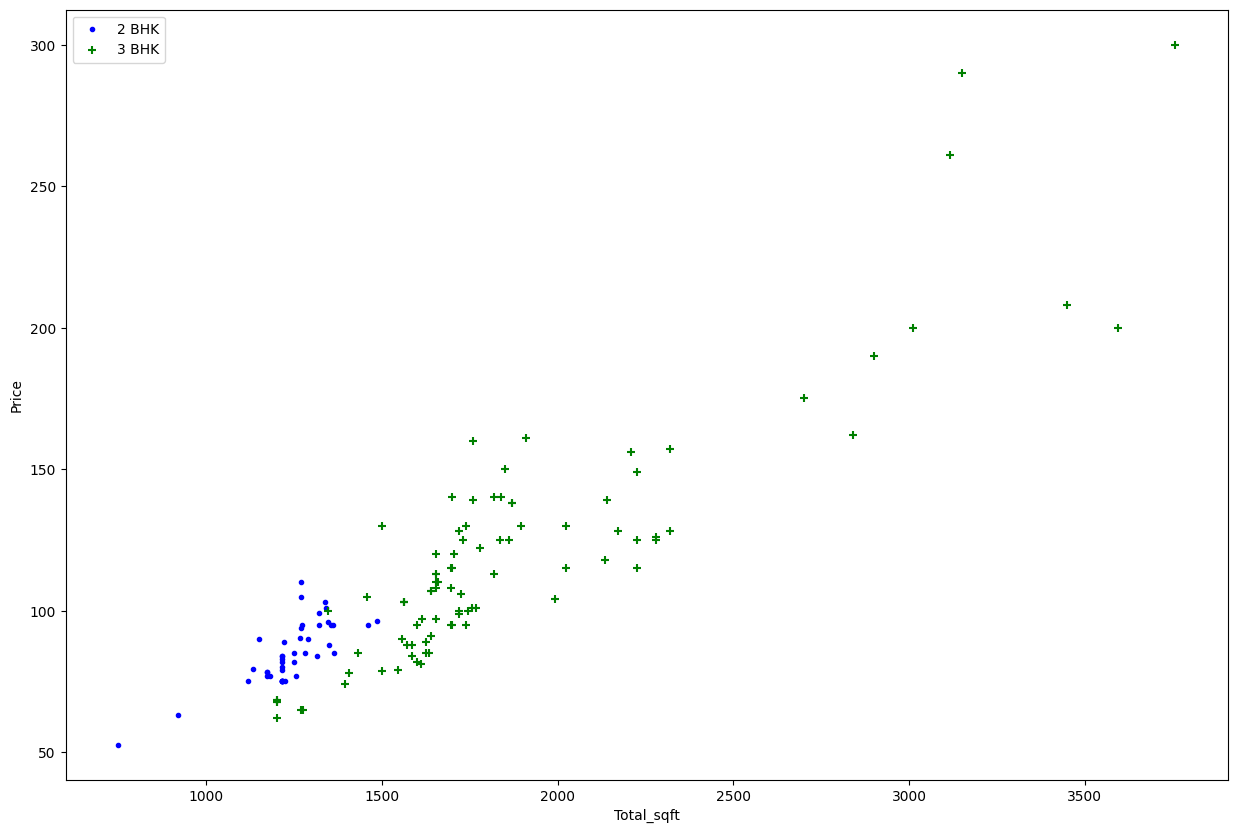

In [51]:
plot_bhk(df4,'Whitefield')

Text(0, 0.5, 'Count')

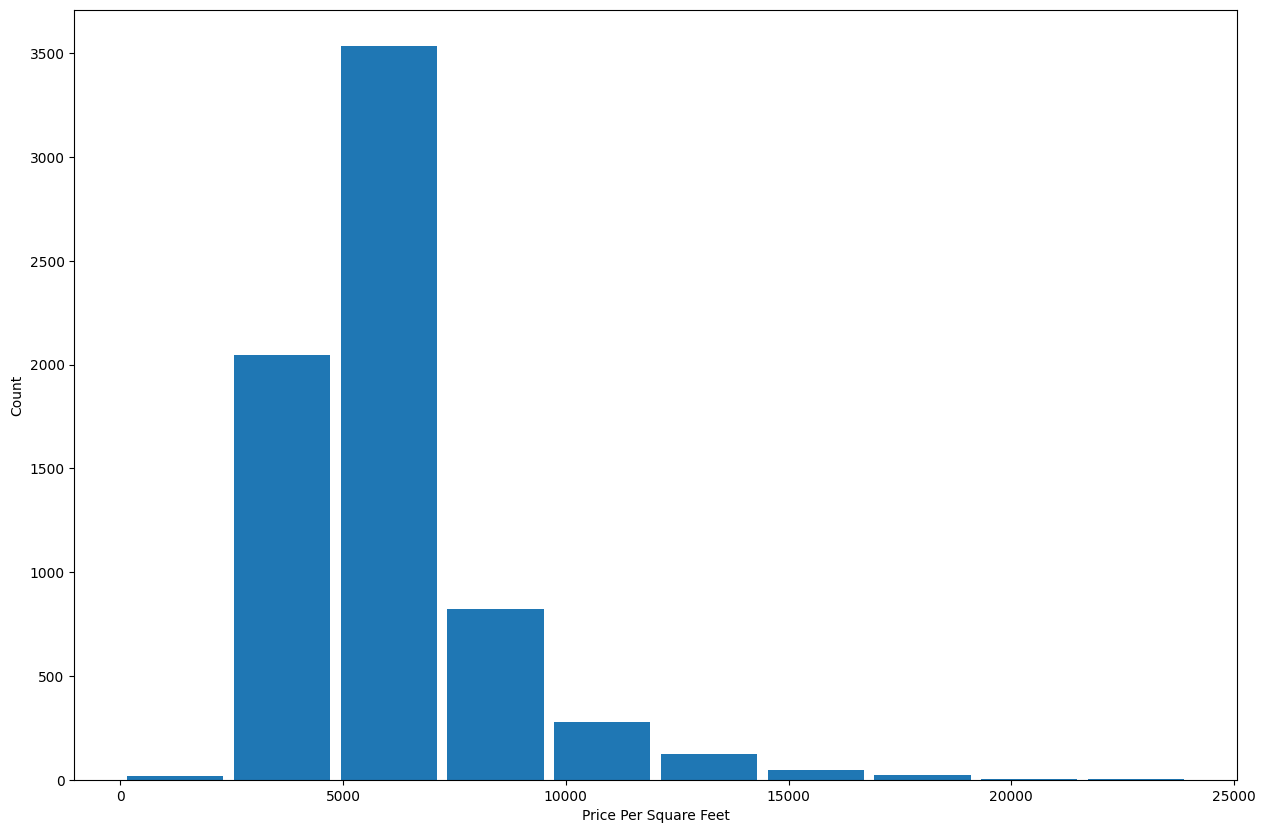

In [56]:
plt.figure(figsize=(15,10))
plt.hist(df4.Price_per_sqft,rwidth=0.9)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")